# Operaciones con tensores

A bajo nivel, lo que Tensorflow ofrece es una serie de operaciones numéricas que trabajan con _arrays_ multidimensionales, matrices de más de 2 dimensiones, también conocidas como "tensores" (no confundir con [el resto de tensores](https://en.wikipedia.org/wiki/Category:Tensors)).

Esencialmente, los tensores son generalizaciones de las matrices con (potencialmente) más dimensiones.

Tensorflow soporta dos estrategias de ejecución: temprana y en grafo. Para facilitar la comprensión y la visualización de resultados, en este tutorial usaremos ejecución temprana. La ejecución en grafo es más rápida porque permite a TensorFlow optimizar nuestro flujo de operaciones previamente a ejecutarlo.

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()

## Operaciones básicas

La definición de tensores se puede hacer de varias formas. Para definirlos "a mano", usaremos `tf.constant` o `tf.Variable` y le pasaremos una lista, anidada con listas tantas veces como dimensiones queramos que tenga nuestro tensor:

In [4]:
c = tf.constant([[1.0, 2.0],
                 [2.0, 3.0]])

Las operaciones implementadas en Tensorflow sobrecargan a los operadores matemáticos de Python. Esto nos permite trabajar de forma más intuitiva, por ejemplo, `x + y` suma los tensores `x` e `y`. El resto de operaciones estarán disponibles como métodos del módulo `tensorfloe`, que hemos renombrado `tf` al cargar: `tf.sin`, `tf.reduce_sum`, `tf.logical_or`...

In [22]:
print((2 * c) * (tf.exp(c) - 1))

tf.Tensor(
[[  3.4365635  25.556225 ]
 [ 25.556225  114.51322  ]], shape=(2, 2), dtype=float32)


**Para saber más**:
    
- [Documentación de `tf.math`](https://www.tensorflow.org/api_docs/python/tf/math)

## Cálculo de derivadas y gradientes

Tensorflow incluye un mecanismo de [diferenciación automática](https://en.wikipedia.org/wiki/Automatic_differentiation), que aprovecha la regla de la cadena para realizar los cómputos de los gradientes en varios pasos de una forma eficiente. Es un método de cálculo numérico pero **exacto**, no realiza aproximaciones. Tampoco es simbólico, es decir, nunca nos dará la función derivada de una función, solamente evaluaciones puntuales.

Vamos a calcular puntualmente la derivada de algunas funciones. En este primer ejemplo, calcularemos la derivada del polinomio $f(x)=2x^2+5x+3$ en los puntos $x=0, 1, 2, 3$. Para ello definimos primero un tensor `x` con los puntos que queremos evaluar, y posteriormente con `GradientTape()` registramos los cálculos necesarios para computar el gradiente de `result` respecto de `x`.

In [5]:
x = tf.Variable([0.0, 1.0, 2.0, 3.0])

In [7]:
with tf.GradientTape() as tape:
    two_x_squared = 2 * x * x
    five_x = 5 * x
    three = 3
    result = two_x_squared + five_x + three
    
grad = tape.gradient(result, x)

print(grad.numpy())

[ 5.  9. 13. 17.]


En este segundo ejemplo, realizamos algo similar para la función exponencial, $\exp(x)=e^x$. Sabemos que es su propia derivada, luego evaluarla en los puntos dados por $x$ debería dar simplemente la exponencial de esos puntos. Lo comprobamos:

In [8]:
with tf.GradientTape() as tape:
    exp_x = tf.exp(x)

grad = tape.gradient(exp_x, x)

print(grad.numpy())

[ 1.         2.7182817  7.389056  20.085537 ]


Usando esto, podemos definirnos una función que aproveche Tensorflow para calcular la derivada de una función en los puntos que queramos:

In [13]:
def grad(f, x):
    x = tf.Variable(x)
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x)
    return t.gradient(out, x).numpy()

¡Ahora podemos incluso dibujar derivadas! Sustituye `tf.tanh` en el siguiente ejemplo por cualquier otra función matemática de Tensorflow, o tu propia función haciendo uso de los operadores que nos proporciona, y comprueba el resultado:

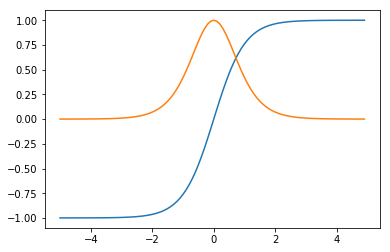

In [20]:
x = [t/10.0 for t in range(-50, 50)]
dy = grad(tf.tanh, x)

plt.plot(x, tf.tanh(x))
plt.plot(x, dy)

**Para saber más**:
- [Automatic differentiation and gradient tape](https://www.tensorflow.org/tutorials/eager/automatic_differentiation)
- [Documentación de `tf.GradientTape()`](https://www.tensorflow.org/api_docs/python/tf/GradientTape)
